In [24]:
import numpy as np  

check = np.random.rand(16,10)

print(check)
print(check.shape)



[[0.63068238 0.10528633 0.50724691 0.90402593 0.23177352 0.1060827
  0.81757145 0.43041111 0.50747363 0.52456967]
 [0.94134081 0.61856151 0.7249676  0.74041837 0.82622575 0.96030831
  0.65877593 0.0141585  0.13764135 0.43842228]
 [0.65935382 0.53188772 0.43009701 0.02639425 0.19559776 0.45791244
  0.46213123 0.13341594 0.35455842 0.74782746]
 [0.96123109 0.39596772 0.55444482 0.43754746 0.50803822 0.36626983
  0.21353502 0.63663723 0.88239724 0.91720666]
 [0.78150668 0.46390011 0.40441424 0.69104336 0.65203648 0.83428362
  0.30976678 0.34551758 0.23010951 0.10000867]
 [0.34320151 0.33995115 0.5779391  0.07902931 0.79917113 0.57612412
  0.37395045 0.49839783 0.77891936 0.96342968]
 [0.94374485 0.44748521 0.40947966 0.45404745 0.49739247 0.97781903
  0.77129017 0.75507653 0.46459603 0.09689964]
 [0.30757596 0.14174732 0.22157345 0.8344797  0.822133   0.37559859
  0.95279651 0.56731553 0.10361898 0.59337725]
 [0.04803424 0.75912885 0.04360835 0.99195344 0.96446964 0.27301631
  0.79073681 

In [3]:
import numpy as np
w = np.array([0.5,-0.4])
x=np.array([2,3])

z= x.dot(w) + 0.1
print(z)

-0.10000000000000017


In [8]:
print(np.zeros((1,10)))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [1]:
import numpy as np 

j = np.random.rand(3,5)
print(j)

[[0.19802379 0.33129948 0.12467686 0.8034151  0.08183619]
 [0.01089595 0.6740638  0.62830832 0.16732991 0.64114837]
 [0.97000561 0.70806097 0.09031581 0.67065197 0.81763015]]


In [5]:
import numpy as np

class SimpleNN:
    def __init__(self, input_dim, num_neurons,activation='tanh',weight_style=None):
        # Xavier initialization for tanh
        self.activation = activation
        if activation == 'tanh':
            if weight_style == 'std':
              self.w1 = np.random.randn(input_dim, num_neurons) * np.sqrt(1./input_dim)
              self.w2 = np.random.randn(num_neurons, 1) * np.sqrt(1./num_neurons)
            elif weight_style == 'range':
              self.w1 = np.random.rand(input_dim, num_neurons)
              self.w2 = np.random.rand(num_neurons, 1)
        elif activation == 'relu':
            if weight_style == 'range':
                self.w1 = np.random.rand(input_dim, num_neurons)
                self.w2 = np.random.rand(num_neurons, 1)
            elif weight_style == 'std': 
                self.w1 = np.random.randn(input_dim, num_neurons) * np.sqrt(2./input_dim)
                self.w2 = np.random.randn(num_neurons, 1) * np.sqrt(2./num_neurons)

            

            
        self.b1 = np.zeros((1, num_neurons))
        self.b2 = np.zeros((1, 1))
        self.Loss = []

    # ---- Activation ----
    def Tanh(self, x):
        return np.tanh(x)

    def tanh_grad(self, h):
        return 1 - h**2   # derivative w.r.t tanh output
    
    def Relu(self,x):
        return np.maximum(0,x)
    
    def relu_grad(self,x):
         return (x > 0).astype(float)

    # ---- Loss ----
    def error(self, actual, esti):
        return 0.5 * (actual - esti) ** 2

        # ---- Forward ----
    def forward(self, X):
        self.input = X
        self.z1 = self.input.dot(self.w1) + self.b1   # (batch, num_neurons)

        if self.activation == 'tanh':
            self.h1 = self.Tanh(self.z1)
        else:  # relu
            self.h1 = self.Relu(self.z1)

        self.y_hat = self.h1.dot(self.w2) + self.b2   # (batch, 1)
        return self.y_hat






    def backprop(self, target, lr=1e-3, clip_norm=1.0):
        m = target.shape[0]
        loss_val = np.mean(0.5 * (target - self.y_hat)**2)
        self.Loss.append(loss_val)

        # output layer
        dl_dy = (self.y_hat - target) / m        # (batch,1) normalized by batch
        dW2 = self.h1.T.dot(dl_dy)               # (num_neurons,1)
        db2 = np.sum(dl_dy, axis=0, keepdims=True)  # (1,1)

        # hidden layer
        dh = dl_dy.dot(self.w2.T)                # (batch, num_neurons)
        if self.activation == 'tanh':
            dz1 = dh * self.tanh_grad(self.z1)
        else:
            dz1 = dh * self.relu_grad(self.z1)

        dW1 = self.input.T.dot(dz1)              # (input_dim, num_neurons)
        db1 = np.sum(dz1, axis=0, keepdims=True) # (1, num_neurons)

        # gradient clipping (per-matrix)
        def clip(g):
            norm = np.linalg.norm(g)
            if norm > clip_norm:
                return g * (clip_norm / (norm + 1e-12))
            return g

        dW2 = clip(dW2); dW1 = clip(dW1)
        db2 = clip(db2); db1 = clip(db1)

        # update
        self.w2 -= lr * dW2
        self.b2 -= lr * db2
        self.w1 -= lr * dW1
        self.b1 -= lr * db1




Epoch 0, Loss = 55.87994094602069
Epoch 500, Loss = 8.367107450171684
Epoch 1000, Loss = 0.6492030406319224
Epoch 1500, Loss = 0.12893403817249852
Epoch 2000, Loss = 0.11938565086283845
Epoch 2500, Loss = 0.03425329459874823
Epoch 3000, Loss = 0.018751650154405303
Epoch 3500, Loss = 0.007703284098079609
Epoch 4000, Loss = 0.0047029261045101346
Epoch 4500, Loss = 0.015742743374676384
Epoch 0 Loss = 25.991636425136655
Epoch 500 Loss = 0.4344224764821275
Epoch 1000 Loss = 0.2634779155789527
Epoch 1500 Loss = 0.07317489017911938
Epoch 2000 Loss = 0.07630858813312705
Epoch 2500 Loss = 0.022836273444058707
Epoch 3000 Loss = 0.011371235751008993
Epoch 3500 Loss = 0.013295441301326556
Epoch 4000 Loss = 0.011266900299955623
Epoch 4500 Loss = 0.0073040677927975195


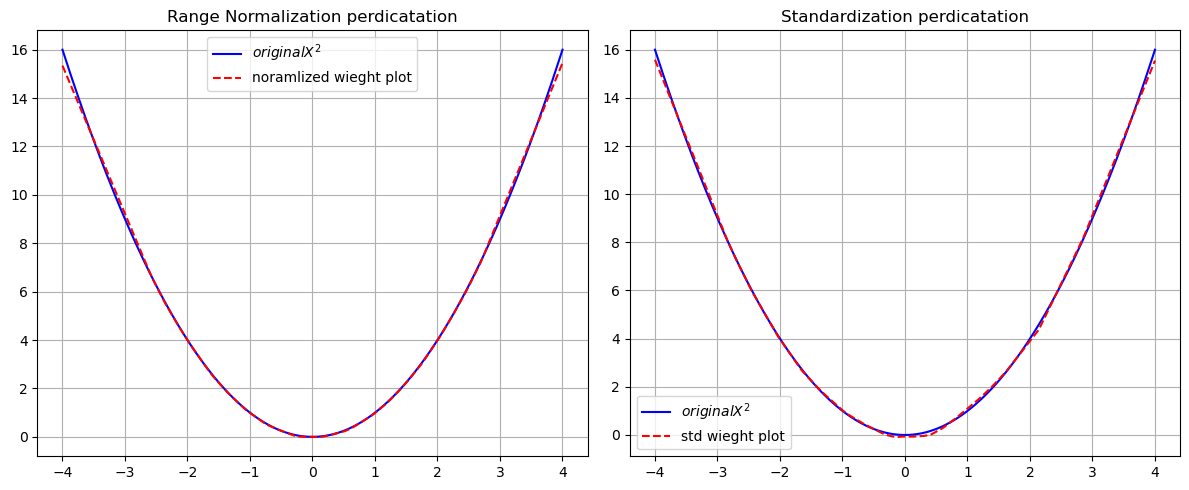

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
minmax = MinMaxScaler(feature_range=(0,1))

X = np.linspace(-4, 4, 500).reshape(-1,1)
Y = X ** 2  

#std x normalization
Xs = scaler.fit_transform(X)

#range normalization
Xn = minmax.fit_transform(X)
nn = SimpleNN(input_dim=1, num_neurons=100,  activation='relu',weight_style='range')

# Training
epochs = 5000

batch_size = 32
lr = 1e-3




##########################################################################
for epoch in range(epochs):
    perm = np.random.permutation(len(Xn))
    for i in range(0,len(Xn),batch_size):
        idx = perm[i:i+batch_size]
        x_b, y_b = Xn[idx], Y[idx]
        nn.forward(x_b)
        nn.backprop(y_b,lr= lr,clip_norm=1.0)
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss = {nn.Loss[-1]}")

#final pred 
y_pred = nn.forward(Xn)




nnsd = SimpleNN(input_dim=1, num_neurons=100,  activation='relu',weight_style='std')

for epi in range(epochs):
    perm = np.random.permutation(len(Xs))
    for i in range(0,len(perm),batch_size):
        idx = perm[i:i+batch_size]
        xb,yb = Xs[idx],Y[idx]
        nnsd.forward(xb)
        nnsd.backprop(yb,lr=lr,clip_norm=1.0)
    if epi % 500 == 0:
            print(f'Epoch {epi} Loss = {nnsd.Loss[-1]}')
    

y_pred2 = nnsd.forward(Xs)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].plot(X,Y,label="$original X^2$",color='blue')
axes[0].plot(X,y_pred,label='noramlized wieght plot',color='red', linestyle='--')
axes[0].set_title('Range Normalization perdicatation')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(X,Y,label="$original X^2$",color='blue')
axes[1].plot(X,y_pred2,label='std wieght plot',color='red', linestyle='--')
axes[1].set_title('Standardization perdicatation')
axes[1].legend()
axes[1].grid(True)


plt.tight_layout()
plt.show()






In [72]:
import pickle

with open('simpleNN.pkl','wb') as f:
    pickle.dump(nn,f)

prediction working great


mini sgd

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN:
    def __init__(self, input_dim, num_neurons, activation='tanh'):
        self.activation = activation
        fan_in, fan_out = input_dim, num_neurons
        # Xavier init (good for tanh); for ReLU use He: * np.sqrt(2/fan_in)
        std1 = np.sqrt(2.0 / (fan_in + fan_out))
        self.w1 = np.random.randn(fan_in, fan_out) * std1
        self.b1 = np.zeros((1, fan_out))
        std2 = np.sqrt(2.0 / (fan_out + 1))
        self.w2 = np.random.randn(fan_out, 1) * std2
        self.b2 = np.zeros((1, 1))
        self.Loss = []

    def forward(self, x):
        self.input = x                       # (batch, input_dim)
        self.z1 = x.dot(self.w1) + self.b1   # (batch, num_neurons)
        if self.activation == 'tanh':
            self.h1 = np.tanh(self.z1)
        else:
            self.h1 = np.maximum(0, self.z1)
        self.y_hat = self.h1.dot(self.w2) + self.b2   # (batch,1)
        return self.y_hat

    def relu_grad(self, z): return (z > 0).astype(float)
    def tanh_grad(self, z): return 1.0 - np.tanh(z)**2

   
    def backprop(self, target, lr=1e-3, clip_norm=1.0):
        m = target.shape[0]
        loss_val = np.mean(0.5 * (target - self.y_hat)**2)
        self.Loss.append(loss_val)

        # output layer
        dL_dy = (self.y_hat - target) / m        # (batch,1) normalized by batch
        dW2 = self.h1.T.dot(dL_dy)               # (num_neurons,1)
        db2 = np.sum(dL_dy, axis=0, keepdims=True)  # (1,1)

        # hidden layer
        dh = dL_dy.dot(self.w2.T)                # (batch, num_neurons)
        if self.activation == 'tanh':
            dz1 = dh * self.tanh_grad(self.z1)
        else:
            dz1 = dh * self.relu_grad(self.z1)

        dW1 = self.input.T.dot(dz1)              # (input_dim, num_neurons)
        db1 = np.sum(dz1, axis=0, keepdims=True) # (1, num_neurons)

        # gradient clipping (per-matrix)
        def clip(g):
            norm = np.linalg.norm(g)
            if norm > clip_norm:
                return g * (clip_norm / (norm + 1e-12))
            return g

        dW2 = clip(dW2); dW1 = clip(dW1)
        db2 = clip(db2); db1 = clip(db1)

        # update
        self.w2 -= lr * dW2
        self.b2 -= lr * db2
        self.w1 -= lr * dW1
        self.b1 -= lr * db1



0 loss 34.07963445015221
400 loss 0.20531829112450484
800 loss 0.12016665908814408
1200 loss 0.016343407995994683
1600 loss 0.013004564430911811
2000 loss 0.008121102367191674
2400 loss 0.010820689309717257
2800 loss 0.011840122459658656
3200 loss 0.0015248982501494762
3600 loss 0.002647348671285177


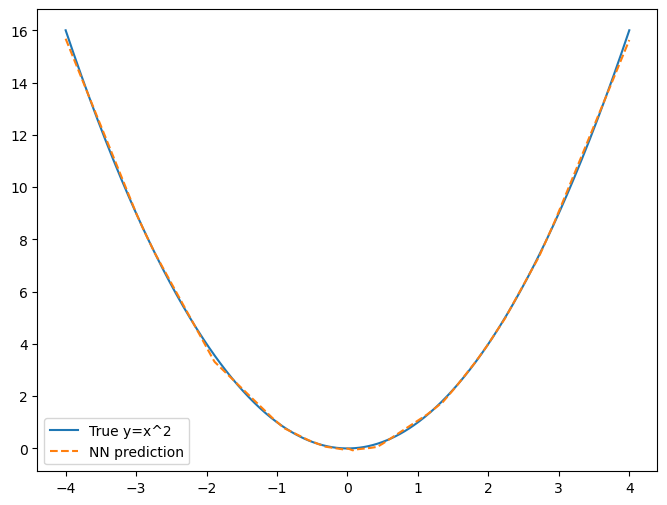

In [75]:
# ---- data prep ----
X = np.linspace(-4, 4, 500).reshape(-1,1)
Y = X ** 2 


# normalize X (important)
X_mean, X_std = X.mean(axis=0), X.std(axis=0) + 1e-12
Xn = (X - X_mean) / X_std

# model & train
nn = SimpleNN(input_dim=1, num_neurons=50, activation='relu')
epochs = 4000
batch_size = 32
lr = 1e-3

for epoch in range(epochs):
    # mini-batch SGD
    perm = np.random.permutation(len(Xn))
    for i in range(0, len(Xn), batch_size):
        idx = perm[i:i+batch_size]
        xb, yb = Xn[idx], Y[idx]
        nn.forward(xb)
        nn.backprop(yb, lr=lr, clip_norm=1.0)

    if epoch % 400 == 0:
        print(epoch, "loss", nn.Loss[-1])

# final predictions (remember to feed normalized X)
Y_pred = nn.forward(Xn)

# plot
plt.figure(figsize=(8,6))
plt.plot(X, Y, label='True y=x^2')
plt.plot(X, Y_pred, '--', label='NN prediction')
plt.legend()
plt.show()


In [ ]:
np.random.randn(1,10)
np.random.rand(1,1)

array([[0.75400846]])

In [5]:
Loss.backward()

print('Loss : ',Loss.item())
print(f'dl_dw is {m.grad.item()}')
print(f'dl_dw is {b.grad.item()}')


Loss :  4.5
dl_dw is 6.0
dl_dw is 3.0


In [18]:
x,t = torch.tensor(2), torch.tensor(5)

w1,b1 = torch.tensor(1.0,requires_grad=True), torch.tensor(0.0,requires_grad=True)

w2,b2 = torch.tensor(-1.0,requires_grad=True), torch.tensor(1.0,requires_grad=True)

v1,v2,c = torch.tensor(2.0,requires_grad=True), torch.tensor(-3.0,requires_grad=True), torch.tensor(0.0,requires_grad=True)




In [19]:
h1 = w1*x + b1
h2 = w2*x + b2

print(f'h1 is {h1} and h2 is {h2}')
print(c)

h1 is 2.0 and h2 is -1.0
tensor(0., requires_grad=True)


In [20]:
y = (v1 * h1) + (v2 * h2) + c

print(f'y is: {y}')

loss = 0.5 * (y-t)**2
print(loss)

y is: 7.0
tensor(2., grad_fn=<MulBackward0>)


In [21]:
loss.backward()

print(f'loss grads {loss.item()}')
print(f'w1 and b1 is {w1.grad.item()} and b1 grad is {b1.grad.item()}')
print(f'w2 and b2 is {w2.grad.item()} and b1 grad is {b2.grad.item()}')
print(f'v1 and v2 is {v1.grad.item()} and v2 is {v2.grad.item()} c grad is {c.grad.item()}')


loss grads 2.0
w1 and b1 is 8.0 and b1 grad is 4.0
w2 and b2 is -12.0 and b1 grad is -6.0
v1 and v2 is 4.0 and v2 is -2.0 c grad is 2.0


In [21]:
import torch

class SimpleNN_Torch:
    def __init__(self, input_dim, num_neurons, activation='tanh', weight_style=None, device='cpu'):
        self.activation = activation
        self.device = device

        # init weights like before
        if activation == 'tanh':
            if weight_style == 'std':
                self.w1 = torch.randn(input_dim, num_neurons, device=device, requires_grad=True) 
                self.w2 = torch.randn(num_neurons, 1, device=device, requires_grad=True) 
            elif weight_style == 'range':
                self.w1 = torch.rand(input_dim, num_neurons, device=device, requires_grad=True)
                self.w2 = torch.rand(num_neurons, 1, device=device, requires_grad=True)

        elif activation == 'relu':
            if weight_style == 'std':
                self.w1 = torch.randn(input_dim, num_neurons, device=device, requires_grad=True) 
                self.w2 = torch.randn(num_neurons, 1, device=device, requires_grad=True) 
            elif weight_style == 'range':
                self.w1 = torch.rand(input_dim, num_neurons, device=device, requires_grad=True)
                self.w2 = torch.rand(num_neurons, 1, device=device, requires_grad=True)

        self.b1 = torch.zeros(1, num_neurons, device=device, requires_grad=True)
        self.b2 = torch.zeros(1, 1, device=device, requires_grad=True)

        self.Loss = []

    def forward(self, X):
        z1 = X @ self.w1 + self.b1
        if self.activation == 'tanh':
            h1 = torch.tanh(z1)
        else:
            h1 = torch.relu(z1)
        y_hat = h1 @ self.w2 + self.b2
        return y_hat

    def step(self, lr=1e-3, clip_norm=1.0):
       torch.nn.utils.clip_grad_norm_([self.w1,self.w2,self.b1,self.b2],max_norm=1.0)

       with torch.no_grad():
           self.w1 -= lr*self.w1.grad
           self.w2 -= lr * self.w2.grad
           self.b1 -= lr * self.b1.grad
           self.b2 -= lr * self.b2.grad

           #resetting the gradien
           self.w1.grad.zero_()
           self.w2.grad.zero_()
           self.b1.grad.zero_()
           self.b2.grad.zero_()

           

Epoch 0, Loss = 133.53753662109375
Epoch 500, Loss = 0.5373920798301697
Epoch 1000, Loss = 0.15616199374198914
Epoch 1500, Loss = 0.15399834513664246
Epoch 2000, Loss = 0.015662088990211487
Epoch 2500, Loss = 0.029124129563570023
Epoch 3000, Loss = 0.008401098661124706
Epoch 3500, Loss = 0.004283244721591473
Epoch 4000, Loss = 0.010141241364181042
Epoch 4500, Loss = 0.009495435282588005


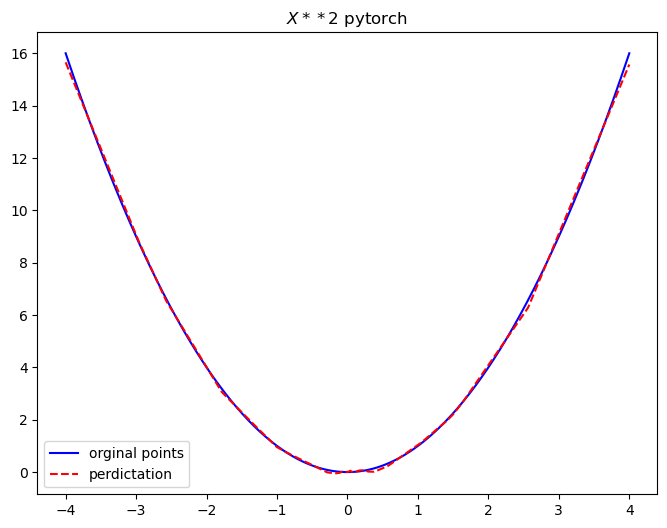

In [27]:
# dataset
X = torch.linspace(-4, 4, 500).reshape(-1,1)
Y = X**2

# model
nn = SimpleNN_Torch(input_dim=1, num_neurons=100, activation='relu', weight_style='std')

epochs = 5000
lr = 1e-3
batch_size = 32

for epoch in range(epochs):
    perm = torch.randperm(X.size(0))
    for i in range(0, len(perm), batch_size):
        idx = perm[i:i+batch_size]
        xb, yb = X[idx], Y[idx]

        y_pred = nn.forward(xb)

        loss = torch.mean(0.5 * (yb-y_pred)**2)
        loss.backward()
        nn.step(lr=lr, clip_norm=1.0)

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss = {loss.item()}")


y_p = nn.forward(xb)

y_p = nn.forward(X).detach().numpy()   # full dataset prediction

plt.figure(figsize=(8,6))
plt.plot(X.numpy(),Y.numpy(),label='orginal points',color='blue')
plt.plot(X.numpy(),y_p, label='perdictation',color='red',linestyle='--')
plt.title("$X**2$ pytorch")
plt.legend()
plt.show()

